In [ ]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install pandas-ta
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=2cdd6c69d753aa06c5d7c6895e7196145c1a2de02b1ed48000e0e397ab7cef1f
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import date, time
import yfinance as yf
import pandas_ta as ta
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# Download historical stock market data
df = yf.download('TSLA', start='2015-01-01', end=date.today(), progress=False)

In [ ]:
# Calculate technical analysis indicators
df['RSI(2)'] = ta.rsi(df['Close'], length=2)
df['RSI(7)'] = ta.rsi(df['Close'], length=7)
df['RSI(14)'] = ta.rsi(df['Close'], length=14)
df['CCI(30)'] = ta.cci(close=df['Close'], length=30, high=df['High'], low=df['Low'])
df['CCI(50)'] = ta.cci(close=df['Close'], length=50, high=df['High'], low=df['Low'])
df['CCI(100)'] = ta.cci(close=df['Close'], length=100, high=df['High'], low=df['Low'])


In [ ]:
# Label data based on trading signals
df['LABEL'] = np.where(df['Open'].shift(-2).gt(df['Open'].shift(-1)), "1", "0")
df = df.dropna()


In [ ]:
# Split data into training and testing sets
X = df[df.columns[6:-1]].values
y = df['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
# Train MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000)

In [ ]:
# Predictions on training and testing data
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
# Evaluate model performance
from sklearn.metrics import classification_report
print('Train Data Accuracy:')
print(classification_report(y_train, predict_train))
print('Testing Data Accuracy:')
print(classification_report(y_test, predict_test))

Train Data Accuracy:
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       757
           1       0.57      0.58      0.58       783

    accuracy                           0.56      1540
   macro avg       0.56      0.56      0.56      1540
weighted avg       0.56      0.56      0.56      1540

Testing Data Accuracy:
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       314
           1       0.52      0.52      0.52       346

    accuracy                           0.50       660
   macro avg       0.49      0.49      0.49       660
weighted avg       0.50      0.50      0.50       660



<ipython-input-13-f83af9378cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = np.append(predict_train, predict_test)
<ipython-input-13-f83af9378cc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strategy Returns'] = np.where(df['Prediction'].eq("1"), df['Open'].shift(-2) - df['Open'].shift(-1), 0)
<ipython-input-13-f83af9378cc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



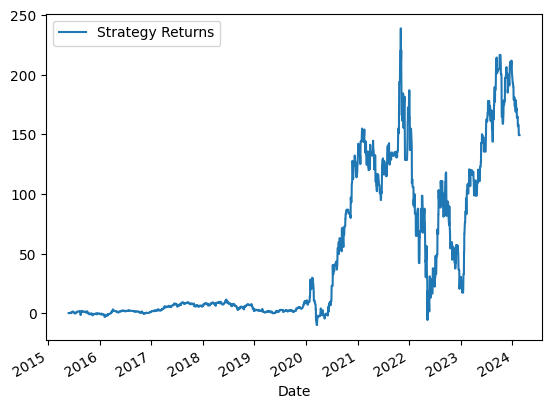

In [ ]:
# Backtest the trading strategy
df['Prediction'] = np.append(predict_train, predict_test)
df['Strategy Returns'] = np.where(df['Prediction'].eq("1"), df['Open'].shift(-2) - df['Open'].shift(-1), 0)
df['Strategy Returns'] = df['Strategy Returns'].cumsum()
df.plot(y='Strategy Returns')
plt.show()

In [ ]:
# Forecast today's return
prediction = df.iloc[-1]['Prediction']
if prediction == "1":
  print("Today's return forecast: UP")
else:
  print("Today's return forecast: DOWN")


Today's return forecast: DOWN


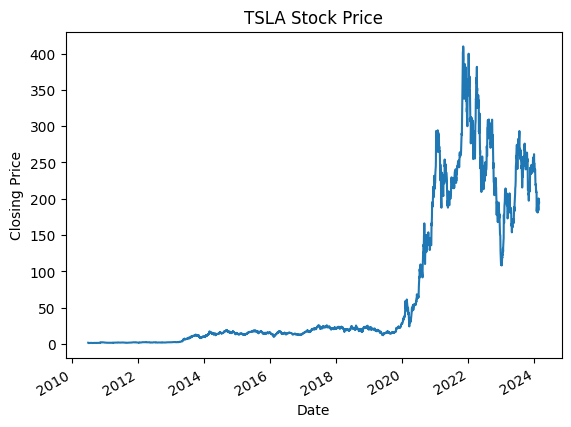

Train Data Accuracy:
              precision    recall  f1-score   support

           0       0.56      0.37      0.44      1127
           1       0.55      0.73      0.63      1208

    accuracy                           0.56      2335
   macro avg       0.56      0.55      0.54      2335
weighted avg       0.56      0.56      0.54      2335

Testing Data Accuracy:
              precision    recall  f1-score   support

           0       0.49      0.32      0.39       484
           1       0.52      0.69      0.59       517

    accuracy                           0.51      1001
   macro avg       0.51      0.51      0.49      1001
weighted avg       0.51      0.51      0.49      1001



<ipython-input-15-d597466bfa67>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = np.append(predict_train, predict_test)
<ipython-input-15-d597466bfa67>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strategy Returns'] = np.where(df['Prediction'].eq("1"), df['Open'].shift(-2) - df['Open'].shift(-1), 0)
<ipython-input-15-d597466bfa67>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

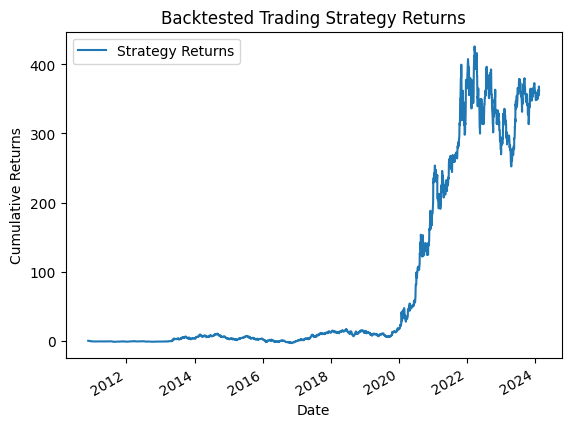

Today's return forecast: UP


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time
import yfinance as yf
import pandas_ta as ta
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

# Downloading historical stock market data
df = yf.download('TSLA', start='2000-01-01', end=date.today(), progress=False)

# Plotting closing prices
df['Close'].plot(title='TSLA Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Calculating technical analysis indicators
df['RSI(2)'] = ta.rsi(df['Close'], length=2)
df['RSI(7)'] = ta.rsi(df['Close'], length=7)
df['RSI(14)'] = ta.rsi(df['Close'], length=14)
df['CCI(30)'] = ta.cci(close=df['Close'], length=30, high=df['High'], low=df['Low'])
df['CCI(50)'] = ta.cci(close=df['Close'], length=50, high=df['High'], low=df['Low'])
df['CCI(100)'] = ta.cci(close=df['Close'], length=100, high=df['High'], low=df['Low'])

# Labeling data based on trading signals
df['LABEL'] = np.where(df['Open'].shift(-2).gt(df['Open'].shift(-1)), "1", "0")
df = df.dropna()

# Splitting data into training and testing sets
X = df[df.columns[6:-1]].values
y = df['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# Making predictions on training and testing data
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

# Evaluating model performance
print('Train Data Accuracy:')
print(classification_report(y_train, predict_train))
print('Testing Data Accuracy:')
print(classification_report(y_test, predict_test))

# Backtesting the trading strategy
df['Prediction'] = np.append(predict_train, predict_test)
df['Strategy Returns'] = np.where(df['Prediction'].eq("1"), df['Open'].shift(-2) - df['Open'].shift(-1), 0)
df['Strategy Returns'] = df['Strategy Returns'].cumsum()
df.plot(y='Strategy Returns')
plt.title('Backtested Trading Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Forecasting today's return
prediction = df.iloc[-1]['Prediction']
if prediction == "1":
  print("Today's return forecast: UP")
else:
  print("Today's return forecast: DOWN")
